## Convert XMLs to CSVs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

xml_files = ['../raw_data/wax_data_raw/oneDflames_Twall=653.0BigDT_.xml', '../raw_data/wax_data_raw/oneDflames_Twall=653.0_.xml']
#xml_files =['../raw_data/PMMAO2_Coupled_NoRadiation_FuelDecomposition/Vg=10cm_s/TwoDflames_Vg0.1_.xml', '../raw_data/PMMAO2_Coupled_NoRadiation_FuelDecomposition/Vg=15cm_s/TwoDflames_Vg0.15_.xml']
#xml_files = glob.glob(f'{os.environ["HOME"]}/PMMA_AIR+RADIATION/*/*/TwoDflames/*.xml')
#xml_files += glob.glob(f'{os.environ["HOME"]}/PMMA_AIR+RADIATION/*/TwoDflames/*.xml')
#xml_files = glob.glob('../raw_data/PMMAAIR_Coupled_Radiation_Fuel_Decomposition/*/*.xml')
print(xml_files)
print(len(xml_files))

['../raw_data/wax_data_raw/oneDflames_Twall=653.0BigDT_.xml', '../raw_data/wax_data_raw/oneDflames_Twall=653.0_.xml']
2


In [3]:
def read_simmit_xml(xml_fn):
    assert os.path.exists(xml_fn) # file must exist, or we get really weird errors...
    df=pd.read_xml(xml_fn, parser='etree')
    df=df.drop(columns='vars')
    sub_dfs = []
    for i, row in df.iterrows():
        key = row['key']
        row=row.drop('key')
        row = {k:map(float, v.split(',')) for k,v in row.items()}
        new_df = pd.DataFrame(row)
        new_df['key']=key
        sub_dfs.append(new_df)
    expanded_df = pd.concat(sub_dfs, axis=0)
    return expanded_df

In [4]:
import os
dfs = list(map(read_simmit_xml, xml_files))
for name, df in zip(xml_files, dfs):
    name = os.path.splitext(name)[0] + '.csv'
    print(f'saving xml to csv file: {name}!')
    df.to_csv(name, index=False)
master_df = pd.concat(dfs, axis=0) # of xml data

saving xml to csv file: ../raw_data/wax_data_raw/oneDflames_Twall=653.0BigDT_.csv!
saving xml to csv file: ../raw_data/wax_data_raw/oneDflames_Twall=653.0_.csv!


In [5]:
print(master_df.columns)
master_df.describe()

Index(['q', 'X', 'rho', 'T', 'p', 'energy', 'Enthalpy', 'vel', 'mu', 'R',
       ...
       'souspecHOCN', 'souspecHNCO', 'souspecNCO', 'souspecC3H7',
       'souspecC3H8', 'souspecCH2CHO', 'souspecCH3CHO', 'souspecN2', 'souener',
       'key'],
      dtype='object', length=122)


,q,X,rho,T,p,energy,Enthalpy,vel,mu,R,...,souspecHOCN,souspecHNCO,souspecNCO,souspecC3H7,souspecC3H8,souspecCH2CHO,souspecCH3CHO,souspecN2,souener,key
count,1.866200e+04,18662.000000,18662.000000,18662.000000,18662.0,1.866200e+04,1.866200e+04,18662.0,18662.000000,18662.000000,...,1.866200e+04,1.866200e+04,1.866200e+04,1.866200e+04,1.866200e+04,1.866200e+04,1.866200e+04,1.866200e+04,1.866200e+04,18662.000000
mean,1.110037e+05,0.001179,0.249993,1913.355365,101325.0,2.332968e+06,3.085828e+06,0.0,0.000058,375.158752,...,-1.286595e-10,-6.329278e-09,4.402044e-07,2.501244e-01,-1.797875e+01,2.135799e+00,2.193938e-01,3.002093e-07,8.772616e+09,0.002350
std,1.710482e+06,0.001716,0.245213,996.069461,0.0,1.424381e+06,1.859024e+06,0.0,0.000019,77.469666,...,5.743602e-09,1.852882e-07,5.838305e-05,1.203183e+01,8.768156e+01,3.574153e+01,2.291297e+00,2.742729e-05,3.642434e+10,0.002726
min,-1.736660e+07,0.000000,0.069657,298.150000,101325.0,-7.746972e+04,1.044961e-02,0.0,0.000018,259.834744,...,-3.331457e-07,-3.653345e-06,-1.072215e-04,-8.090327e+01,-8.911335e+02,-1.890584e+02,-1.416060e+01,-3.442153e-06,-1.712070e+10,0.000000
25%,-3.857130e+05,0.000083,0.087806,938.696136,101325.0,1.023288e+06,1.353991e+06,0.0,0.000042,296.257603,...,-8.072668e-13,-7.243275e-12,-3.032745e-12,-4.138645e-03,-2.953201e-01,-2.445104e-03,-4.043943e-04,-9.837331e-12,7.553220e+05,0.000281
50%,5.273558e+04,0.000446,0.132551,1922.595930,101325.0,2.478133e+06,3.244673e+06,0.0,0.000061,373.037214,...,-1.364154e-21,-1.108554e-29,-6.716943e-21,-4.351216e-08,-4.522853e-04,-1.189741e-07,-6.186577e-08,-3.345470e-29,6.492119e+07,0.001155
75%,5.393616e+05,0.001497,0.313116,2952.117019,101325.0,3.648050e+06,4.799096e+06,0.0,0.000077,442.247143,...,0.000000e+00,2.059701e-23,-4.205034e-26,0.000000e+00,-9.711921e-12,1.133729e-07,1.869780e-05,3.009891e-30,1.707401e+09,0.003487
max,1.411833e+07,0.010000,1.307930,3348.071439,101325.0,4.573968e+06,6.000964e+06,0.0,0.000082,527.698636,...,5.737719e-08,6.374615e-06,7.956689e-03,1.602755e+02,4.941692e+01,6.929215e+02,2.610182e+01,3.597646e-03,3.477393e+11,0.010000


In [6]:
#missing_aliases = {'YiCH2_lP_S_rP_': 'YiCH2(S)', 'souspecCH2_lP_S_rP_': 'souspecCH2(S)'}
aliases = {'X': 'Xpos', 'key': 'flame_key', 'YiCH2_lP_S_rP_': 'YiCH2(S)', 'souspecCH2_lP_S_rP_': 'souspecCH2(S)'}
for k in aliases: # fix aliases to make it match correct format
    if k in master_df.columns:
        master_df[aliases[k]] = master_df[k]
        del master_df[k]

/tmp/ipykernel_3022163/3160243985.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  master_df[aliases[k]] = master_df[k]
/tmp/ipykernel_3022163/3160243985.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  master_df[aliases[k]] = master_df[k]
/tmp/ipykernel_3022163/3160243985.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, u

In [7]:
#master_df.to_csv('../2D_PMMA-Air+Radiation_master.csv', index=False)
#master_df.to_csv('../2D_PMMA-Air_master-big.csv', index=False)
master_df.to_csv('../wax-master-test.csv', index=False)

In [14]:
master_df['Xpos']

0      0.000000
1      0.000074
2      0.000221
3      0.000368
4      0.000515
         ...   
116    0.021838
117    0.022027
118    0.022216
119    0.022405
120    0.022500
Name: Xpos, Length: 173514, dtype: float64

## Inspect 2D Data:

In [8]:
wax_master = pd.read_csv('../wax-master-test.csv')
print('columns: ', list(wax_master.columns))
#wax_master.describe()

columns:  ['q', 'rho', 'T', 'p', 'energy', 'Enthalpy', 'vel', 'mu', 'R', 'enthalpy', 'Cp', 'k', 'Dm', 'Zmix', 'YiCH4', 'YiH', 'YiO', 'YiO2', 'YiOH', 'YiH2O', 'YiHO2', 'YiH2O2', 'YiC', 'YiCH', 'YiCH2', 'YiCH3', 'YiH2', 'YiCO', 'YiCO2', 'YiHCO', 'YiCH2O', 'YiCH2OH', 'YiCH3O', 'YiCH3OH', 'YiC2H', 'YiC2H2', 'YiC2H3', 'YiC2H4', 'YiC2H5', 'YiC2H6', 'YiHCCO', 'YiCH2CO', 'YiHCCOH', 'YiN', 'YiNH', 'YiNH2', 'YiNH3', 'YiNNH', 'YiNO', 'YiNO2', 'YiN2O', 'YiHNO', 'YiCN', 'YiHCN', 'YiH2CN', 'YiHCNN', 'YiHCNO', 'YiHOCN', 'YiHNCO', 'YiNCO', 'YiC3H7', 'YiC3H8', 'YiCH2CHO', 'YiCH3CHO', 'YiN2', 'YiAR', 'souspecCH4', 'souspecH', 'souspecO', 'souspecO2', 'souspecOH', 'souspecH2O', 'souspecHO2', 'souspecH2O2', 'souspecC', 'souspecCH', 'souspecCH2', 'souspecCH3', 'souspecH2', 'souspecCO', 'souspecCO2', 'souspecHCO', 'souspecCH2O', 'souspecCH2OH', 'souspecCH3O', 'souspecCH3OH', 'souspecC2H', 'souspecC2H2', 'souspecC2H3', 'souspecC2H4', 'souspecC2H5', 'souspecC2H6', 'souspecHCCO', 'souspecCH2CO', 'souspecHCCOH'

In [9]:
print('master_df columns: ', list(master_df.columns))
Yi_cols = list(filter(lambda x: x.startswith('Yi'), list(master_df.columns)))
missing_cols = sorted(list(set(wax_master.columns)-set(master_df.columns)))
new_columns = sorted(list(set(master_df.columns)-set(wax_master.columns)))
print('Num Yi_cols: ',len(Yi_cols))
print('='*50)
print('Missing columns: ', missing_cols)
print('='*50)
print('New columns: ', new_columns)
print('='*50)
misc_new_cols = list(filter(lambda x: not x.startswith('souspec'), missing_cols))
print('Misc missing columns: ', misc_new_cols)
print('len(misc_missing_cols): ', len(misc_new_cols))
print('='*50)
misc_new_cols = list(filter(lambda x: not x.startswith('souspec'), new_columns))
print('Misc new columns: ', misc_new_cols)
print('len(misc_new_columns): ', len(misc_new_cols))

master_df columns:  ['q', 'rho', 'T', 'p', 'energy', 'Enthalpy', 'vel', 'mu', 'R', 'enthalpy', 'Cp', 'k', 'Dm', 'Zmix', 'YiCH4', 'YiH', 'YiO', 'YiO2', 'YiOH', 'YiH2O', 'YiHO2', 'YiH2O2', 'YiC', 'YiCH', 'YiCH2', 'YiCH3', 'YiH2', 'YiCO', 'YiCO2', 'YiHCO', 'YiCH2O', 'YiCH2OH', 'YiCH3O', 'YiCH3OH', 'YiC2H', 'YiC2H2', 'YiC2H3', 'YiC2H4', 'YiC2H5', 'YiC2H6', 'YiHCCO', 'YiCH2CO', 'YiHCCOH', 'YiN', 'YiNH', 'YiNH2', 'YiNH3', 'YiNNH', 'YiNO', 'YiNO2', 'YiN2O', 'YiHNO', 'YiCN', 'YiHCN', 'YiH2CN', 'YiHCNN', 'YiHCNO', 'YiHOCN', 'YiHNCO', 'YiNCO', 'YiC3H7', 'YiC3H8', 'YiCH2CHO', 'YiCH3CHO', 'YiN2', 'YiAR', 'souspecCH4', 'souspecH', 'souspecO', 'souspecO2', 'souspecOH', 'souspecH2O', 'souspecHO2', 'souspecH2O2', 'souspecC', 'souspecCH', 'souspecCH2', 'souspecCH3', 'souspecH2', 'souspecCO', 'souspecCO2', 'souspecHCO', 'souspecCH2O', 'souspecCH2OH', 'souspecCH3O', 'souspecCH3OH', 'souspecC2H', 'souspecC2H2', 'souspecC2H3', 'souspecC2H4', 'souspecC2H5', 'souspecC2H6', 'souspecHCCO', 'souspecCH2CO', 'sou

In [10]:
' '.join(list(master_df.columns)).index('Zmix')

52

## Fix Old Methaine Air Data

In [11]:
org_df = pd.read_csv('../NewData_flames_data_with_L1_L2_errors_CH4-AIR_without_trimming(SouSpec_Included).txt')
org_df.columns = map(lambda x: x.strip(), org_df.columns)  # deal with annoying spaces in column names
org_df = org_df.drop(columns=['X','Cpv', 'souEVCpv', 'souener_actual', 'souener_pred', 'L1_ERR', 'L2_ERR', 'PRCNT_ERR'])

FileNotFoundError: [Errno 2] No such file or directory: '../NewData_flames_data_with_L1_L2_errors_CH4-AIR_without_trimming(SouSpec_Included).txt'

(array([12497.,  2517.,  1311.,   822.,   544.,   372.,   257.,   180.,
           99.,    63.]),
 array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
        0.009, 0.01 ]),
 <BarContainer object of 10 artists>)

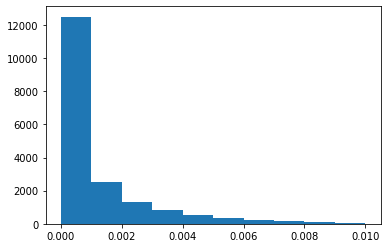

In [11]:
plt.hist(master_df['X'])

(array([8127., 3473., 1794., 1110.,  732.,  498.,  333.,  209.,  121.,
          47.]),
 array([3.39072695e-07, 3.23297684e-04, 6.46256296e-04, 9.69214908e-04,
        1.29217352e-03, 1.61513213e-03, 1.93809074e-03, 2.26104935e-03,
        2.58400797e-03, 2.90696658e-03, 3.22992519e-03]),
 <BarContainer object of 10 artists>)

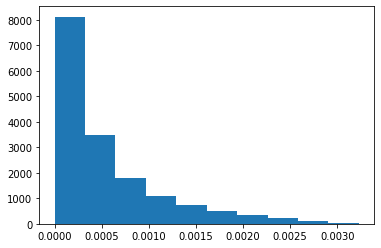

In [12]:
plt.hist(org_df['Xpos'])

In [133]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
scaler = preprocessing.QuantileTransformer()
master_scaled = pd.DataFrame(scaler.fit_transform(full_master_df))

In [134]:
org_scaled = pd.DataFrame(scaler.fit_transform(org_df))
xml_scaled = pd.DataFrame(scaler.fit_transform(master_df))

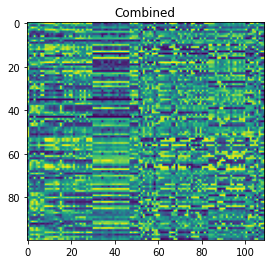

In [135]:
def plot_df(df, title):
    sample = np.asarray(df.sample(n=100))
    plt.imshow(sample)
    plt.title(title)
plot_df(master_scaled, 'Combined')

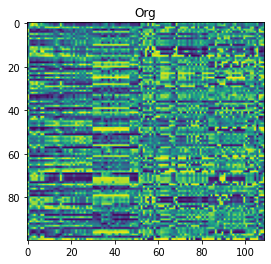

In [150]:
plot_df(org_scaled, 'Org')

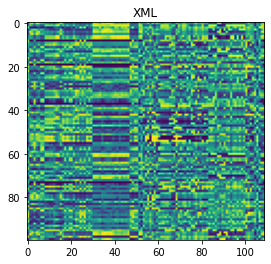

In [149]:
plot_df(xml_scaled, 'XML')